# Algorithms For Data Science - Homework 2  
Katie Snedeker

## Import Packages and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, normalize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import seaborn as sns
%matplotlib inline

In [2]:
from math import sqrt, cos, pi

In [3]:
# iris dataset manually uploaded
iris = pd.read_csv("iris(3).csv")
pd.DataFrame.head(iris)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Problem 1 - Module 3 
*Note this is not a Collaborative Problem*

10 Points Total  
In this problem, implement code to normalize the data in two forms, the first is by feature in
the range of [0 1] (Note: Use the Data Processing.pdf Section 4.1.1 Min-max normalization),
the second is by observation where each observations feature sums to unit length (1). The Iris
data is to be used.

(a) (5 Points) Normalize the Iris data by feature in the range of [0 1] as described in the Min-max normalization section.  


In [4]:
# get the numeric columns, since species does not get normalized
num_columns = ['sepal_length',
               'sepal_width',
               'petal_length',
               'petal_width']
# scale using sklearns built in MinMaxScaler function
scaler = MinMaxScaler()
scaler.fit(iris[num_columns])
iris_scaled = scaler.transform(iris[num_columns])

(b) (5 Points) Normalize the Iris data by observation to unit length, note that each of the
observations features need to sum to 1.

In [5]:
scaler_b = normalize(iris[num_columns],norm='l1')
# Check some rows to make sure they add up to 1
print(sum(scaler_b[1]))
print(sum(scaler_b[100]))
print(sum(scaler_b[149]))

1.0
1.0
1.0


## Problem 2
*Note this is not a Collaborative Problem*  

15 Points Total  
In this problem the goal is to build a set of numerical images from a set of arrays. The data set
is from the Kaggle web site will be used: https://www.kaggle.com/c/digit-recognizer/data
This data has a training.csv, test.csv and sample submission.csv files. In this exercise the focus
will be on the train.csv data.   
**The web site has the following data description:**
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero
through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each
pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel,
with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.
The training data set, (train.csv), has 785 columns. The first column, called ”label”, is the digit
that was drawn by the user. The rest of the columns contain the pixel-values of the associated
image.  
Each pixel column in the training set has a name like pixel x, where x is an integer between
0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as
x = i ∗ 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixel x is located on
row i and column j of a 28 x 28 matrix, (indexing by zero).For example, pixel 31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below. 

This data is set up in a csv file which will require the reshaping of the data to be 28 × 28 matrix
representing images. There are 42000 images in the train.csv file. For this problem it is only
necessary to process approximately 100 images, 10 each of the numbers from 0 through 9. The
goal is to learn how to generate features from images using transforms and first order statistics.


(a) (5 points) Develop an algorithm to read in the train.csv file.

In [6]:
# train dataset manually uploaded to directory
train = pd.read_csv("train.csv")
pd.DataFrame.head(train)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# keep only 1000 observations
train = train.iloc[0:1000,:]
print(train.shape)

(1000, 785)


(b) (5 points) Develop an algorithm to store the data in a data structure of your choice so that
the data is reshaped into a matrix of size 28 × 28.

In [8]:
# remove the label, create a y value
y_train = train["label"]
# create x dataset without the label
x_train = train.drop(['label'], axis=1)
print(x_train.shape)
print(y_train.value_counts())

(1000, 784)
2    124
0    107
7    105
4    102
9     97
6     97
1     96
8     93
3     90
5     89
Name: label, dtype: int64


In [9]:
# Reshape into a (1000,28,28) dimension matrix
x_train = x_train.values.reshape(-1,28,28)
print(x_train.shape)
print(type(x_train))

(1000, 28, 28)
<class 'numpy.ndarray'>


(c) (5 points) Plot the developed matrix for indices 1, 2, 4, 7, 8, 9, 11, 12, 17, and 22. These
indices represent the numerical values from 0 to 9.

The images for those indices are shown below, however do not represent the numerical values from 0 to 9. Some other indices were chosen after to show the numerical values from 0 to 0 instead. 

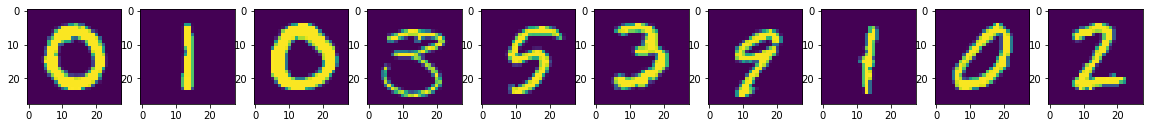

In [10]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ind = [1,2,4,7,8,9,11,12,17,22]
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[ind[i]][:,:])
plt.show()

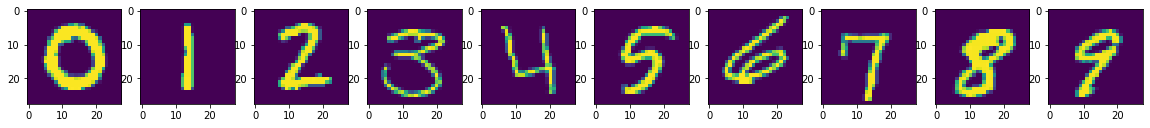

In [11]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ind = [1,2,22,7,3,8,21,6,10,11]
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[ind[i]][:,:])
plt.show()

## Problem 3 - Module 4 
*Note this is a Collaborative Problem*   

70 Points Total  
In this problem each image from the train.csv is to be processed to generate a set of features
using the discrete cosine transform and principal component analysis.  

(a) (15 points) Take the 2 dimensional Discrete Cosine Transform (DCT) of each matrix from
Problem 2, the matrix represents each number.

Attempted to first use just the dct() function on its own, but was getting very different results from the people in the discussion. After looking things up online, found the below implemention from stack exchange which gave an example doing a 2D DCT.

https://stackoverflow.com/questions/7110899/how-do-i-apply-a-dct-to-an-image-in-python

In [12]:
from scipy.fftpack import fft, dct
def dct2(a):
    return dct(dct(a.T).T)

In [13]:
# iterate through the x_train array and call the dct2 function on each number
# store the 2d DCT for each first in a list, then convert to an array

digits = []
for i in range(1000):
    dct_i = dct2(x_train[i][:,:])
    digits.append(dct_i)
digits_dct = np.asarray(digits)
digits_dct.shape

(1000, 28, 28)

Below is code from the discussion from James. Copied it here for a comparison to using the built in dct function in scipy. 

In [14]:
# Jame's Method from the discussion
def DCT_V2(x: np.ndarray) -> np.ndarray:
    n, m    = x.shape
    dct_mat = np.zeros((n, m))
    
    T = np.zeros((n, m))
    for i in range(n):
        for j in range(n):
            if i == 0:
                T[i, j] = 1 / sqrt(n)
            else:
                T[i, j] = (sqrt(2) / sqrt(n)) * cos(((2*j + 1)*(i * pi)) / (2*n))
                
    dct = T.dot(x).dot(T.T)
    return dct

In [15]:
# iterate through the x_train array and call the DCT_V2 function on each number
# store the 2d DCT for each first in a list, then convert to an array

digits2 = []
for i in range(1000):
    dct_i2 = DCT_V2(x_train[i][:,:])
    digits2.append(dct_i2)
digits_dct2 = np.asarray(digits2)
digits_dct2.shape

(1000, 28, 28)

Below is a comparison of the original image, the results from the dct2 function, and the results from James' function posted in the discussion. The results are similar but have some differences in colors. To stay consistent with the group, will use the digits2 array from the 2nd method for the remaining problems. 

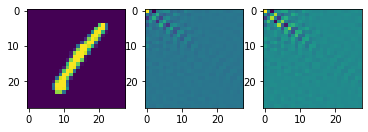

In [16]:
f, axarr = plt.subplots(1,3)
axarr[0].imshow(x_train[0])
axarr[1].imshow(digits_dct[0][:,:])
axarr[2].imshow(digits_dct2[0][:,:])

(b) (10 points) Extract the vertical, horizontal and diagonal coefficients from the transform.

The diagMask, vertMask, and horizMask were copied from the numerical feature generator example code file in MATLAB. 

In [17]:
diagMask = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,
            0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
vertMask = np.array([0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
            0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
horizMask = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
             1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

In [18]:
diagMask = diagMask.reshape(28,28)
vertMask = vertMask.reshape(28,28)
horizMask = horizMask.reshape(28,28)

Attempted to find indices using the np.argwhere() function. However, the results were a 2-D array rather than 1-D. Using the astype(bool) as seen in a discussion post was helpful to easily identify the indices. 

In [19]:
# indexD = np.argwhere(diagMask==1)
# indexV = np.argwhere(vertMask ==1)
# indexH = np.argwhere(horizMask==1)

# used this method from discussion to index. using np.argwhere gave a 2-d matrix instead
indexD = diagMask.astype(bool)
indexV = vertMask.astype(bool)
indexH = horizMask.astype(bool)

Followed example from numericalFeatureGeneratorExample(1).m to write the following loop.

In [20]:
dataD = []
dataV = []
dataH = []
for i in range(1000):
#     dataD.append(digits_dct2[i,:,:][indexD])
#     dataV.append(digits_dct2[i,:,:][indexV])
#     dataH.append(digits_dct2[i,:,:][indexH])
    imgD = np.multiply(digits_dct2[i,:,:],diagMask)
    imgV = np.multiply(digits_dct2[i,:,:],vertMask)
    imgH = np.multiply(digits_dct2[i,:,:],horizMask)
    
    dataD.append(imgD[indexD])
    dataV.append(imgV[indexV])
    dataH.append(imgH[indexH])
    
dataD = np.asarray(dataD)
dataV = np.asarray(dataV)
dataH = np.asarray(dataH)

In [21]:
print(dataD.shape)
print(dataV.shape)
print(dataH.shape)

(1000, 335)
(1000, 224)
(1000, 224)


(c) (15 points) For each of the three sets of DCT coefficients perform Principal Component
Analysis (PCA).

In [22]:
from sklearn.decomposition import PCA

In [23]:
pcaD = PCA()
fitD = pcaD.fit_transform(dataD)

In [24]:
pcaV = PCA()
fitV = pcaV.fit_transform(dataV)

In [25]:
pcaH = PCA()
fitH = pcaH.fit_transform(dataH)

Attempt 2 - Following the example from numericalFeatureGenerator(1).m and this post from stack exchange to recreate MATLAB's pcacov() function in python.  
https://stackoverflow.com/questions/47048812/matlabs-pcacov-on-numpy-scipy

In [26]:
eigValD, eigVecD = np.linalg.eigh(np.cov(dataD.T))

In [27]:
eigValV, eigVecV = np.linalg.eigh(np.cov(dataV.T))

In [28]:
eigValH, eigVecH = np.linalg.eigh(np.cov(dataH.T))

(d) (10 Points) Retain either the top n number of principal components or the top principal
components with maximum variance.

From the discussion, decided to also retain n = 10 principal components for the vertical and horizontal arrays and n = 15 for the diagonal. 

**Diagonal**

In [29]:
valuesD = pcaD.explained_variance_ratio_
print(valuesD[0:15])

[0.13559164 0.10329745 0.07645712 0.06600328 0.05991518 0.04425302
 0.04296079 0.03945775 0.03110731 0.02575539 0.02352599 0.0205511
 0.01823407 0.01649497 0.01616316]


In [30]:
indxD = np.where(eigValD >= 4)
indxD_top = indxD[0][:15,]
indxD_top

array([47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61],
      dtype=int64)

**Vertical**

In [31]:
valuesV = pcaV.explained_variance_ratio_
print(valuesV[0:10])

[0.16887464 0.10472441 0.07449422 0.06795881 0.05589539 0.04553234
 0.03769831 0.03507698 0.02923143 0.02816771]


In [32]:
indxV = np.where(eigValV >= 4)
indxV_top = indxV[0][:10,]
indxV_top

array([30, 31, 32, 33, 34, 35, 36, 37, 38, 39], dtype=int64)

**Horizontal**

In [33]:
valuesH = pcaH.explained_variance_ratio_
print(valuesH[0:10])

[0.14605074 0.12023431 0.08329107 0.06378547 0.057137   0.04493399
 0.03683886 0.0350112  0.02992819 0.02632048]


In [34]:
indxH = np.where(eigValH >= 4)
indxH_top = indxH[0][:10,]
indxH_top

array([31, 32, 33, 34, 35, 36, 37, 38, 39, 40], dtype=int64)

(e) (15 points) Use your top principal components to reduce the DCT transformed data. This will create a lower-dimensional representation of the data set.

Redued the dimensions of the matrices by slicing the DCT transformed data. 

In [35]:
reducedD = dataD[:,indxD_top] #dataD[:,0:15]
reducedD.shape

(1000, 15)

In [36]:
reducedV = dataV[:,indxV_top] #dataV[:,0:10]
reducedV.shape

(1000, 10)

In [37]:
reducedH = dataH[:,indxH_top] #dataH[:,0:10]
reducedH.shape

(1000, 10)

(f) (5 points) Save the new data in a file of your choice, *.txt, *.csv, etc.

Converted from a numpy array to data frame then used the df.to_csv() function.

In [38]:
reducedD = pd.DataFrame(reducedD)
reducedV = pd.DataFrame(reducedV)
reducedH = pd.DataFrame(reducedH)

In [39]:
reducedD.to_csv('reduced_diag.csv',index=False)
reducedV.to_csv('reduced_vert.csv',index=False)
reducedH.to_csv('reduced_horiz.csv',index=False)

## Problem 4 - Module 5 
*This is a Collaborative Problem*  

5 Points Total + 25 Bonus Points  
In this problem, you will be developing pseudocode and implementing your development in
Python or R for the Expectation Maximization method. You are allowed to use either the Iris
data set or the developed numerical features from HW2. In this problem the following is to be
completed:

(a) (5 Points) Use a built-in Gaussian Mixture model to cluster the Iris data (the petal length
and petal width features) into 3 clusters. This is a good reference Iris Exploration (PCA,
k-Means and GMM clustering).

In [40]:
features=['petal_length',
          'petal_width']
iris_petal = iris[features]

In [41]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, random_state=0).fit(iris_petal)

Code for plotting is from: <br>
https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/#:~:text=Gaussian%20Mixture%20Models%20(GMMs)%20assume,to%20a%20single%20distribution%20together

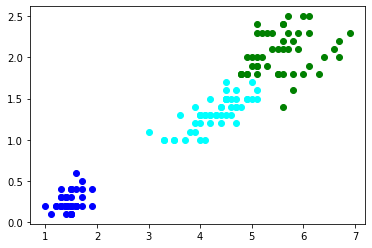

In [42]:
# Get labels
labels = gm.predict(iris_petal)
frame = pd.DataFrame(iris_petal)
frame['cluster'] = labels
frame.columns = ['Weight', 'Height', 'cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])
plt.show()

(b) (10 points) The development and implementation of the Expectation Maximization method.
The implementation should be for a generic number of clusters, features and observations.

From EM slides in class: 

Input Data --> Initialize mean, signma, and probability --> Complete E Step then M Step until mean, signma, and probability converge --> If convergence, then membership probabilities

Attempting to adapt MATLAB code from "simpleExpectationMaximization.m" for this problem and used the following link as an additional resource. 

https://colab.research.google.com/github/krasserm/bayesian-machine-learning/blob/master/latent_variable_models_part_1.ipynb#scrollTo=EynBcbPYutmB

In [ ]:
def EM(data, prob, m, sigma,K, threshold):
    """
    EM Algorithm: given initial estimates of p, mu, and sigma, the EM will 
    iterate until convergence to a local max of the likelihood function
    
    Args: 
        data: observed data with shape (N,D)
        prob: posterior probabilities
        m: mu, component means
        sigma: component covariances
        k: number of sub populations
    
    """ 
    N,D = data.shape # observed data with shape (N,D)
    initializeD = np.ones(shape = (D, 1))
    initializeN = np.ones(shape = (1, N))
    numberOfIterations = 0
    
    while True:
        # Initialize mu, sigma, and probability
        meanPrevious = m
        sigmaPrevious = sigma
        probabilityPrevious = prob
        
        # E step #
        # Conditional prob is generated
        for k in range(K):
            g[k,:] = (exp(-sum((data - m[:, k]*np.ones(shape=(1,data.shape[1]))**2)/(sigma(k)^2)/2)/(sqrt(2*pi)*sigma(k))^D))
            probKg[k, :]= prob(k)*g[k,:]

        prob_ikn =  np.divide(probKg,(np.ones(shape = K.shape[0]))*sum( probKg))

        # M Step #
        sum_prob_ikn = sum(prob_ikn)
        for k in range(k):
            # compute means
            m[:, k] = sum((np.multiply((initializeD *prob_ikn[k, :]),data) /sum_prob_ikn(k)))
            # compute standard deviations
            sigma[k] = sqrt(sum(sum(np.multiply((data- m[:, k] * initializeN)**2),prob_ikn[k, :]))/sum_prob_ikn(k)/D)
        # Mixing probabilites
        prob=sum_prob_ikn/sum(sum_prob_ikn)

        # check for convergence
        meanDelta = max(sqrt(sum((m - meanPrevious)**2)))
        sMean = mean(sqrt(sum(m**2)))

        sigmaDelta = max(sqrt(sum((sigma - sigmaPrevious)**2)))
        sSignma = mean(sqrt(sum(sigma**2)))

        pDelta = max(sqrt(sum((prob - probabilityPrevious)**2)))
        sProbability = mean(sqrt(sum(prob**2)))

        if ((meanDelta<= sMean*threshold)&(sigmaDelta <= sSignma * threshold)&(pDelta <= sProbability * threshold)):
            break
    return prob, m, sigma, prob_ikn, numberOfIterations

(c) Apply your implementation using either the Iris data or the features generated from from
Problem 2.  
i. Use the top two ranked features.  
ii. (5 points) Create 3 clusters for the Iris data or 4 clusters using the 4 numerical values
that have the best separation.  
iii. (5 points) Display the 3 species or 4 numerical values using different colors for a good
visual representation.  
iv. (5 points) Provide an analysis of your results, e.g., what is your observation of the
results, how well did the clusters group each class, etc  

## References<br>
[1] Bishop, Christopher M., Pattern Recognition and Machine Learning, Springer, 2006, <br>
[2] Dempster, A. P., Laird, N. M. and Rubin, D. B., Maximum likelihood from incomplete data
via the EM algorithm, Journal of the Royal Statistical Society B, Volume 39, Number 1,
pp.1–22, 1977<br>
[3] Dillon, and Goldstein, M.. Multivariate Analysis Methods and Applications, John Wiley,
1984 https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognitionand-Machine-Learning-2006.pdf<br>
[4] Duin, Robert P.W., Tax, David and Pekalska, Elzbieta, PRTools, http://prtools.tudelft.nl/<br>
[5] Fisher, R.A., The use of Multiple Measurements in Taxonomic Problems, Annals of Human
Genetics, Vol. 7, Issue 2, pp. 179-188, 1936<br>
[6] Hotelling, H., Analysis of a complex of statistical variables into principal components, Journal of Educational Psychology, Number 24, pp. 417–441, 1933<br>
[7] Rao, K. P. and Yip, P., Discrete Cosine Transform Algorithms, Advantages, Applications,
San Diego, CA: Academic Press, Inc., 1990<br>
[8] Tomasi, C., Estimating Gaussian Mixture Densities with EM – A Tutorial, Duke University
Course Notes, 2006, http://www.cs.duke.edu/courses/spring04/cps196.1/handouts/EM/tomasiEM.pdf,
Retrieved Sept 2006<br>

### Reference Links
1. https://www.kaggle.com/code/bburns/iris-exploration-pca-k-means-and-gmm-clustering
2. https://stackoverflow.com/questions/7110899/how-do-i-apply-a-dct-to-an-image-in-python
3. https://stackoverflow.com/questions/47048812/matlabs-pcacov-on-numpy-scipy
4. https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/#:~:text=Gaussian%20Mixture%20Models%20(GMMs)%20assume,to%20a%20single%20distribution%20together
5. https://colab.research.google.com/github/krasserm/bayesian-machine-learning/blob/master/latent_variable_models_part_1.ipynb#scrollTo=EynBcbPYutmB